In [1]:
import statsmodels.api as sm
import numpy as np

In [2]:
arma_process = sm.tsa.ArmaProcess.from_coeffs((),(0.9, 0.3, 0.2))

In [3]:
arma_process

ArmaProcess([1.0], [1.0, 0.9, 0.3, 0.2], nobs=100) at 0x7fbf442d0f70

In [5]:
arma_process.isstationary

True

In [6]:
arma_process.isinvertible

True

In [7]:
samples = arma_process.generate_sample(10000)

In [8]:
samples

array([-0.92050856, -1.27806268,  0.21773092, ..., -2.02057969,
       -1.56118423, -0.97915892])

In [9]:
import seaborn as sns


<Axes: >

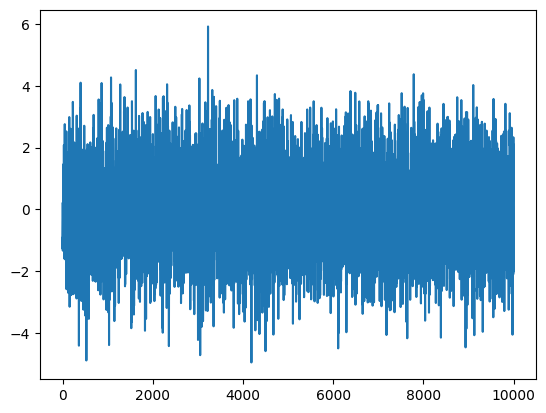

In [11]:
sns.lineplot(samples)

In [12]:
from statsmodels.tsa.stattools import adfuller


In [14]:
# ADF Test
result = adfuller(samples, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: -19.43370138631744
n_lags: 0.0
p-value: 0.0
Critial Values:
   1%, -3.4310059350292894
Critial Values:
   5%, -2.8618298841748397
Critial Values:
   10%, -2.5669243002094593


In [15]:
print ("The ADF statistic indicates that the series in question is stationary; we reject the null hypothesis that the series has a unit root")

The ADF statistic indicates that the series in question is stationary; we reject the null hypothesis that the series has a unit root


In [26]:
import statsmodels.api as sm
import matplotlib.pyplot as plt


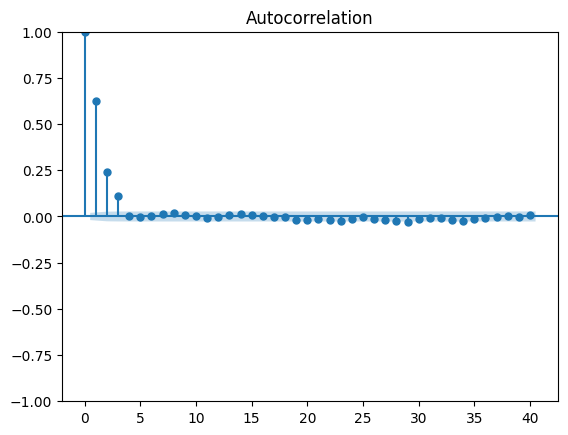

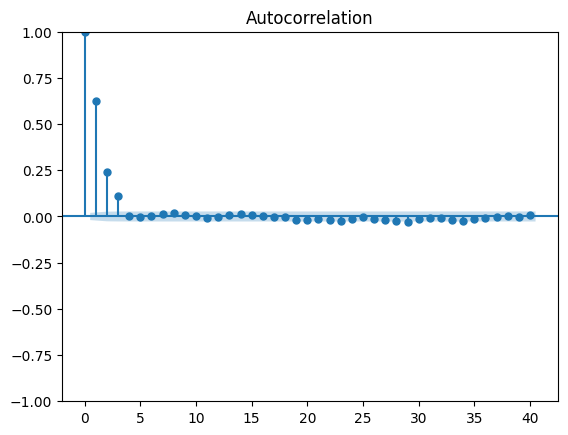

In [32]:
sm.graphics.tsa.plot_acf(samples, lags=40, alpha=0.05)

The autocorrelation plot indicates that the correlations drop off after the third one.  The correlations after the third one are not significant.

One are two turn out to be significant at the 5% level because they happen to lie just outside the blue region.

In [33]:
train = samples[:9800]

In [34]:
test = samples[9800:]

In [41]:
test.shape

(200,)

In [36]:
mean = np.mean(train)

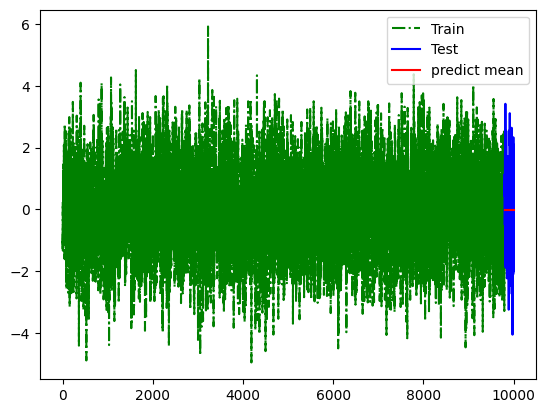

In [50]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(train, 'g-.', label='Train')
ax.plot(range(9800, 10000), test, 'b-', label='Test')
ax.plot(range(9800, 10000), np.array([mean]*200), 'r-', label="predict mean")
plt.legend()

In [43]:
pred = [mean]*200
np.mean((test - pred)**2)

1.9987287407411412

In [44]:
ult = train[-1]

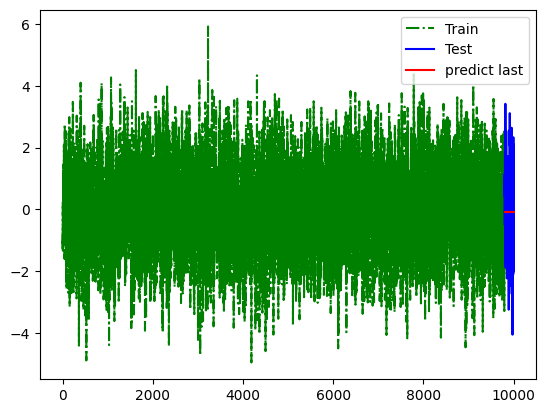

In [49]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(train, 'g-.', label='Train')
ax.plot(range(9800, 10000), test, 'b-', label='Test')
ax.plot(range(9800, 10000), np.array([ult]*200), 'r-', label="predict last")
plt.legend()

In [47]:
pred = [ult]*200
np.mean((test - pred)**2)

1.9839231305937215

In [62]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
pred_MA = []
for i in range(9800, 10000, 3):
  model = SARIMAX(samples[:i], order=(0,0,3))
  res = model.fit(disp=False)
  predictions = res.get_prediction(0, i + 3 - 1)
  pred = predictions.predicted_mean[-3:]
  pred_MA.extend(pred)


In [63]:
pred_MA

[0.32247209844326014,
 0.12907941607183046,
 0.13954444745735087,
 0.9613256920038032,
 0.24211510801010766,
 0.19734159178875202,
 -0.4555752499178351,
 -0.1235894149951357,
 -0.061692141074944605,
 -0.03548039940427078,
 0.03248961555221608,
 -0.09095150661842039,
 -0.4867941915764554,
 -0.5000537956462492,
 -0.05373463631166649,
 -1.387704538127936,
 -0.35253379982527355,
 -0.3441191594126062,
 2.0987479719856537,
 0.8402241740777139,
 0.3597491202616035,
 0.858351093832121,
 0.23393240593532422,
 0.10544705805574421,
 -0.8316954375841514,
 -0.21634794954835895,
 -0.15766983158901424,
 1.2356424982533352,
 0.49991174363792007,
 0.2818192961431187,
 -1.061080318982168,
 -0.3565905834988819,
 -0.1987926046924307,
 -0.1148118148267977,
 -0.1602324368009263,
 -0.09679313110257917,
 0.969403706014463,
 0.474546125421471,
 0.13343024701826617,
 -0.5454075360250951,
 -0.06442629357789675,
 -0.23239621748643055,
 0.6115357997252999,
 0.2015496137273889,
 0.11429834626183145,
 -0.33988302977

In [64]:
len(pred_MA)

201

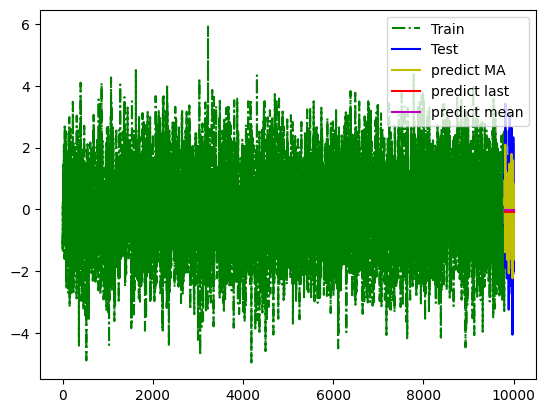

In [77]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(train, 'g-.', label='Train')
ax.plot(range(9800, 10000), test, 'b-', label='Test')
ax.plot(range(9800, 10001), pred_MA, 'y-', label="predict MA")
ax.plot(range(9800, 10000), np.array([ult]*200), 'r-', label="predict last")
ax.plot(range(9800, 10000), np.array([mean]*200), 'm-', label="predict mean")
plt.legend()

In [71]:
np.mean((test - pred_MA[:-1])**2)

1.5639642522278911

Using the moving average prediction results in the best prediction, with the smallest mean squared error.